In [81]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, matplotlib as mpl
import tjy_udf as tjy
mpl.rc_file('tjy.mplstyle')

## Import Qualtrics CSV

In [5]:
from pathlib import Path
p = Path('C:/Users/takas/OneDrive/Desktop/2025 GA Financial Census_May 15, 2025_21.34.csv')
df = pd.read_csv(p,header=1)

## Clean Qualtrics CSV

In [28]:
df1 = df.drop([0])

# No previews
df1 = df1[df1['Response Type']!='Survey Preview'].reset_index(drop=True)

# Discard unnecessary data
df1 = df1.iloc[:,17:]

# Print data summary
print('Data read into df1.\n{} responses.\n{} questions asked.'.format(*df1.shape))

Data read into df1.
362 responses.
54 questions asked.


## Background

In [48]:
df_bg = df1.iloc[:,:6]
clabs = df_bg.columns.to_list()
print('Background data read into df_bg.\n{} questions in this section:'.format(df_bg.shape[1]))
print(*['\t{}. {}\n'.format(ind+1, i) for ind, i in enumerate(clabs)])

print_fil = lambda x: print('\t'+str([i for i in x[x.notna()]]))

div_other = df_bg.pop(clabs[1])
print('Other divisions (Q2):')
if div_other.count() > 0: 
    print_fil(div_other)
else: 
    print('\tNone')

dpt_other = df_bg.pop(clabs[3])
print('Other departments (Q4):')
if dpt_other.count() > 0:
    print_fil(dpt_other)
else: 
    print('\tNone')

dpt_speci = df_bg.pop(clabs[4])
print('Specified departments (Q5):')
if dpt_speci.count() > 0:
    print_fil(dpt_speci)
else: 
    print('\tNone')

Background data read into df_bg.
6 questions in this section:
	1. What division is your program in? - Selected Choice
 	2. What division is your program in? - Other (please specify) - Text
 	3. Which department are you in? - Selected Choice
 	4. Which department are you in? - Other (please specify) - Text
 	5. Please specify which department you are in
 	6. What is your degree program?

Other divisions (Q2):
	['Quantitative bio sciences', 'Biophysics', 'QB3']
Other departments (Q4):
	None
Specified departments (Q5):
	None


In [178]:
# Division
div_data = df_bg[clabs[0]]
div_list = div_data[div_data.notna()].unique()
div_list.sort()
counts = [div_data[div_data==div_list[i]].count() for i in range(len(div_list))]
div_names = {'School of Information': 'iSchool', 'College of Chemistry': 'Chemistry', 'School of Public Health': 'Public Health',
            'Letters and Science - Mathematical and Physical Sciences': 'L&S: Math and Phys. Sci.', 'School of Law': 'Law', 
            'Letters and Science - Arts and Humanities': 'L&S: Arts and Hum.', 'School of Optometry': 'Optometry', 'College of Engineering': 'Engineering',
            'College of Environmental Design': 'Environmental Design', 'School of Social Welfare': 'Social Welfare', 'Goldman School of Public Policy': 'Public Policy',
            'Letters and Science - Biological Sciences': 'L&S: Biol. Sci.', 'Berkeley School of Education': 'Education', 'Letters and Science - Social Sciences': 'L&S: Social Sci.',
            'Haas School of Business': 'Business', 'Rausser College of Natural Resources': 'Natural Resources', 'College of Computing, Data Science, and Society': 'Comput., Data Science, and Soc.', 
            'Other (please specify)': 'Other'}
labels = [div_names[i] for i in div_list]

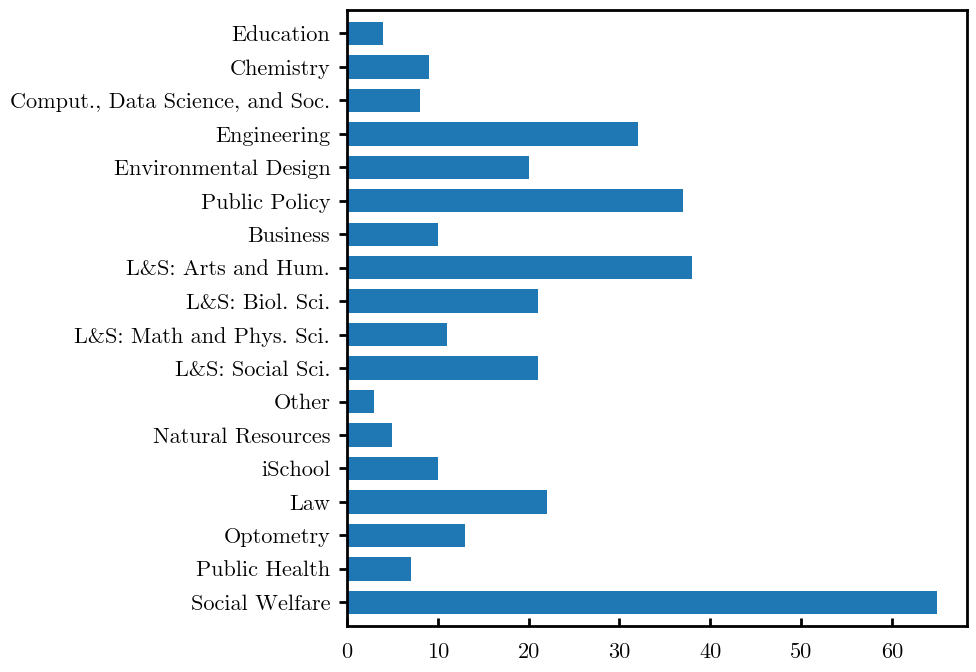

In [181]:
plt.figure(figsize=(8,8))
plt.barh(labels[::-1], counts[::-1], height=0.7)
plt.margins(y=0.02)
tjy.ticks()

In [187]:
# Department
dpt_data = df_bg[clabs[2]]
dpt_list = dpt_data[dpt_data.notna()].unique()
dpt_list.sort()
counts = [dpt_data[dpt_data==dpt_list[i]].count() for i in range(len(dpt_list))]
dpt_names = {'Chemical and Biomolecular Engineering': 'Chem. and Biomol. Eng.', 'Civil and Environmental Engineering': 'Civil and Environ. Eng.', 
             'Electrical Engineering & Computer Sciences': 'Elec. Eng. & Comp. Sci.', 'Environmental Science, Policy, and Management': 'Environ. Sci., Policy, and Manag.'}
# labels = [dpt_names[i] for i in dpt_list]
labels = np.empty(len(dpt_list),dtype=object)
for i in range(len(dpt_list)):
    try: labels[i] = dpt_names[dpt_list[i]]
    except KeyError: labels[i] = dpt_list[i]
print(labels)
        

['Ancient Greek & Roman Studies' 'Anthropology' 'Architecture'
 'Art Practice' 'Astrophysics' 'Bioengineering' 'Biophysics'
 'Biostatistics' 'Business Administration' 'Chem. and Biomol. Eng.'
 'Chemistry' 'Chinese' 'City and Regional Planning'
 'Civil and Environ. Eng.' 'Comparative Literature'
 'Computational Biology' 'Computer Science' 'Development Practice'
 'Economics' 'Education' 'Elec. Eng. & Comp. Sci.' 'Energy and Resources'
 'English' 'Environmental Health Sciences'
 'Environ. Sci., Policy, and Manag.' 'French'
 'Health Policy and Management' 'History'
 'Industrial Engineering and Operations Research'
 'Information & Data Science' 'Information Management & Systems'
 'Integrative Biology' 'Japanese' 'Law' 'Linguistics'
 'Logic & the Methodology of Science' 'Materials Science & Engineering'
 'Mathematics' 'Mechanical Engineering' 'Molecular & Cell Biology' 'Music'
 'Neuroscience' 'Optometry' 'Philosophy' 'Public Affairs' 'Public Health'
 'Public Policy' 'Rhetoric' 'Romance Langu

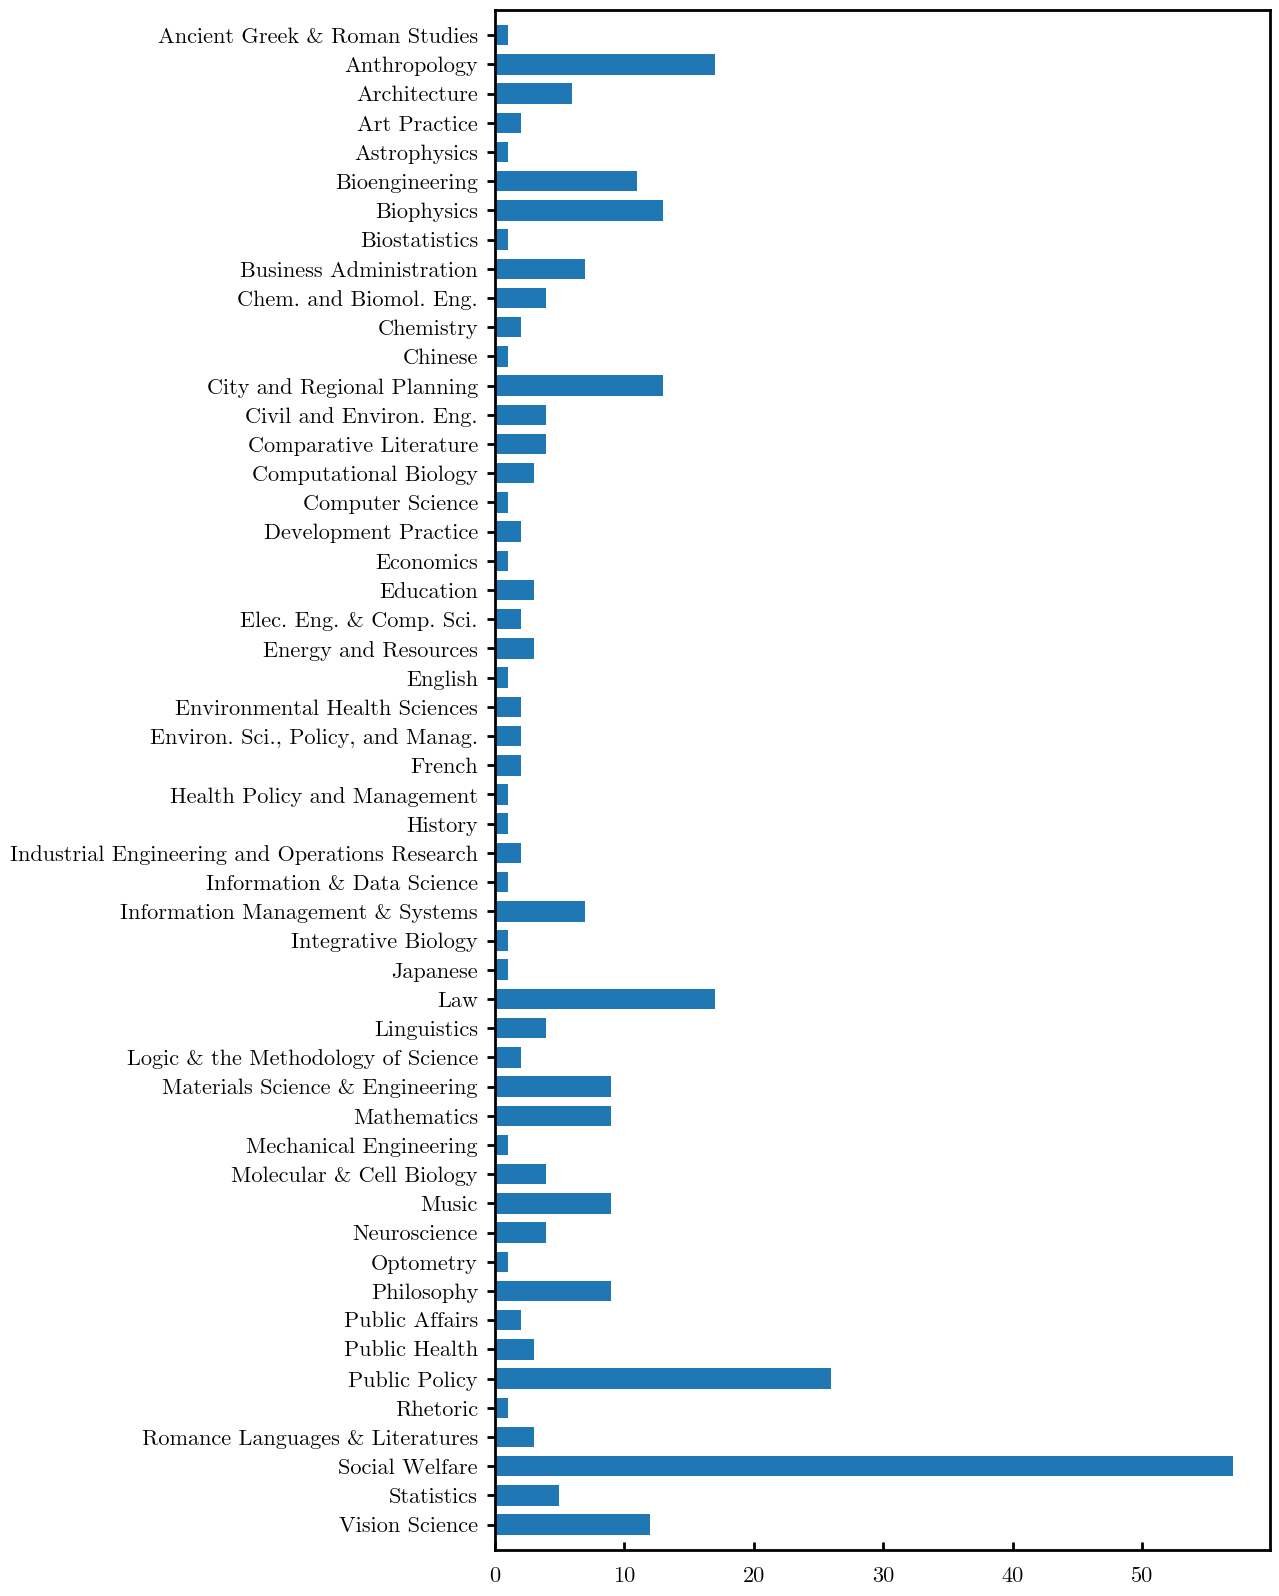

In [188]:
plt.figure(figsize=(10,20))
plt.barh(labels[::-1], counts[::-1], height=0.7, align='center')
plt.margins(y=0.01)
tjy.ticks()